<a href="https://colab.research.google.com/github/Ravi-Nikam/ML/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [505]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [506]:
import pandas as pd
train_data=pd.read_csv('/content/drive/MyDrive/ML/ML_Data_set/TItanic/train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [507]:
import seaborn as sns
from matplotlib.pylab import plt

In [508]:
#sns.pairplot(data=train_data,markers=["o", "s", "D"])
#plt.show()

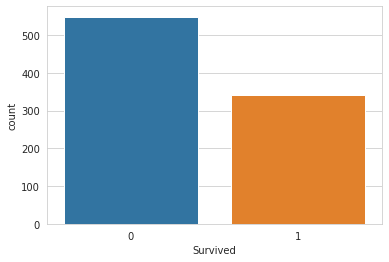

In [509]:
sns.countplot(x='Survived',data=train_data)
plt.show()

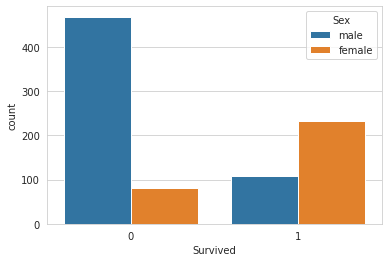

In [510]:
sns.countplot(x='Survived',hue='Sex',data=train_data)
plt.show()

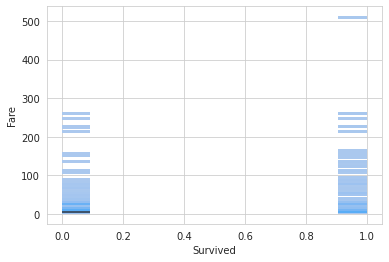

In [511]:
sns.histplot(x='Survived',y='Fare',data=train_data,kde='boxen')
plt.show()

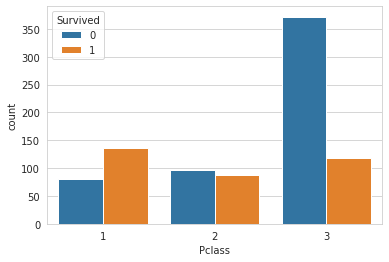

In [512]:
sns.countplot(x='Pclass',hue='Survived',data=train_data)
plt.show()

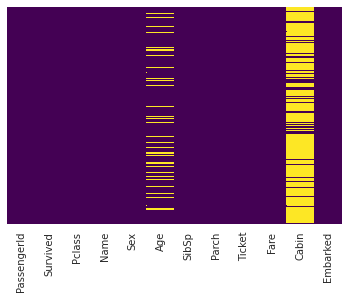

In [513]:
sns.set_style('whitegrid')
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [514]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

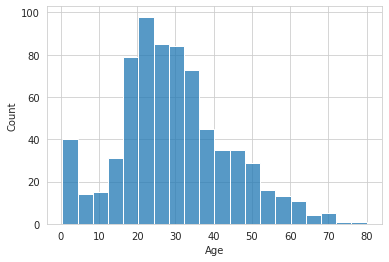

In [515]:
sns.histplot(x=train_data['Age'].dropna(),y=None,data=train_data)
plt.show()

In [516]:
train_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [517]:
train_data.groupby(['Pclass'])['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [518]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 38.23

        elif Pclass == 2:
            return 29.87

        else:
            return 25.14
    else:
        return Age

In [519]:
train_data['Age']=train_data[['Age','Pclass']].apply(impute_age,axis=1)

In [520]:
train_data[train_data['Pclass']==2].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.00,0,0,248706,16.0000,NaN,S
17,18,1,2,"Williams, Mr. Charles Eugene",male,29.87,0,0,244373,13.0000,NaN,S
20,21,0,2,"Fynney, Mr. Joseph J",male,35.00,0,0,239865,26.0000,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.00,0,0,248698,13.0000,D56,S


In [521]:
train_data.drop('Cabin',inplace=True,axis=1)

In [522]:
train_data.dropna(how='any',inplace=True)

In [523]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

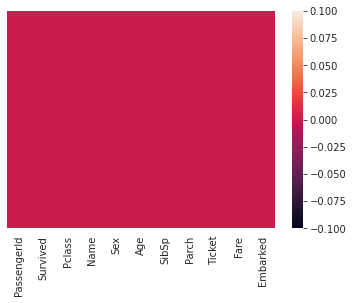

In [524]:
sns.heatmap(train_data.isnull(),yticklabels=False)
plt.show()

In [525]:
train_data['Sex']=pd.get_dummies(train_data['Sex'],drop_first=False)

In [526]:
train_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [527]:
Embarked=pd.get_dummies(train_data['Embarked'],drop_first=True)

In [528]:
train_data=pd.concat([train_data,Embarked],axis=1)

In [529]:
train_data.drop('Embarked',inplace=True,axis=1)

In [530]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,1


In [531]:
train_data['Title']=train_data['Name'].str.extract('([A-Za-z]+)\.',expand=False)

In [532]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Q,S,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.00,1,0,A/5 21171,7.2500,0,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.00,1,0,PC 17599,71.2833,0,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.00,0,0,STON/O2. 3101282,7.9250,0,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.00,1,0,113803,53.1000,0,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.00,0,0,373450,8.0500,0,1,Mr
5,6,0,3,"Moran, Mr. James",0,25.14,0,0,330877,8.4583,1,0,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.00,0,0,17463,51.8625,0,1,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.00,3,1,349909,21.0750,0,1,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.00,0,2,347742,11.1333,0,1,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.00,1,0,237736,30.0708,0,0,Mrs


In [533]:
train_data['Title'].value_counts()

Mr          517
Miss        181
Mrs         124
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Don           1
Countess      1
Capt          1
Mme           1
Lady          1
Jonkheer      1
Ms            1
Sir           1
Name: Title, dtype: int64

In [534]:
train_data['Title']=train_data['Title'].replace({'Dr':'other','Rev':'other','Col':'other','Major':'other',
                                               'Mlle':'other','Don':'other','Countess':'other','Capt':'other',
                                               'Mme':'other','Lady':'other','Jonkheer':'other','Ms':'other','Sir':'other'})

In [535]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Q,S,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,0,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,1,Mr


In [536]:
train_data['Title'].value_counts()

Mr        517
Miss      181
Mrs       124
Master     40
other      27
Name: Title, dtype: int64

In [537]:
#train_data['Title']=pd.get_dummies(train_data['Title'],drop_first=False)

In [538]:
train_data['Title']=train_data['Title'].replace({"Mr":0,"Miss":1,"Mrs":2,"Master":3,"other":4})

In [539]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Q,S,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,0,0,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,1,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,1,0


In [540]:
train_data.drop('Name',axis=1,inplace=True)

In [541]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Q,S,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,0,1,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,0,0,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,0,1,1
3,4,1,1,1,35.0,1,0,113803,53.1000,0,1,2
4,5,0,3,0,35.0,0,0,373450,8.0500,0,1,0


In [542]:
train_data.drop('Ticket',axis=1,inplace=True)
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S,Title
0,1,0,3,0,22.0,1,0,7.2500,0,1,0
1,2,1,1,1,38.0,1,0,71.2833,0,0,2
2,3,1,3,1,26.0,0,0,7.9250,0,1,1
3,4,1,1,1,35.0,1,0,53.1000,0,1,2
4,5,0,3,0,35.0,0,0,8.0500,0,1,0


In [548]:
x=train_data.loc[:,['PassengerId','Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Q', 'S', 'Title']]
x.head()
y=train_data.iloc[:,1]
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [556]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [574]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,p=2)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [575]:
y_pre=knn.predict(x_test)

In [576]:
from sklearn import metrics

In [582]:
acc=knn.score(x_train,y_train)
print(acc)

0.7672672672672672


In [583]:
acc2=knn.score(x_test,y_test)
print(acc2)

0.6143497757847534


In [598]:
from sklearn.metrics import confusion_matrix
cns=confusion_matrix(y_test,y_pre)
print(cns)

[[111  21]
 [ 65  26]]


In [607]:
from sklearn.metrics import accuracy_score
kac=accuracy_score(y_test,y_pre)
print(kac)

0.6143497757847534


In [608]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.63      0.84      0.72       132
           1       0.55      0.29      0.38        91

    accuracy                           0.61       223
   macro avg       0.59      0.56      0.55       223
weighted avg       0.60      0.61      0.58       223



In [586]:
from sklearn.ensemble import RandomForestClassifier
rnn=RandomForestClassifier(n_estimators=100,random_state=0)
rnn.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [587]:
y_pre2=rnn.predict(x_test)

In [588]:
ac=rnn.score(x_train,y_train)
print(ac)

1.0


In [590]:
ac2=rnn.score(x_test,y_test)
print(ac2)

0.7802690582959642


In [594]:
from sklearn.metrics import confusion_matrix
accuracy=confusion_matrix(y_test,y_pre2)
print(accuracy)

[[114  18]
 [ 31  60]]


In [604]:
from sklearn.metrics import accuracy_score
sc=accuracy_score(y_test,y_pre2)
print(sc)

0.7802690582959642


In [606]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pre2))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       132
           1       0.77      0.66      0.71        91

    accuracy                           0.78       223
   macro avg       0.78      0.76      0.77       223
weighted avg       0.78      0.78      0.78       223

